In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [2]:
data_folder = 'original'

In [3]:
pages = pd.read_csv(f'data/{data_folder}/pages.csv', index_col=0)
images = pd.read_csv(f'data/{data_folder}/images.csv', index_col=0)
page_data = pd.read_csv(f'data/{data_folder}/page_data.csv', index_col=0)
links = pd.read_csv(f'data/{data_folder}/links.csv')
sites = pd.read_csv(f'data/{data_folder}/sites.csv', index_col=0)

/Users/lojzezust/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
pages

,page_type_code,url,length,html_content_hash,http_status_code,accessed_time,domain
id,,,,,,,
73983,HTML,https://www.si-trust.gov.si/sl/podpora-uporabn...,13539.0,b0e891116f86198df70a11287088a24a,200.0,2020-03-31 23:06:26.005615,www.si-trust.gov.si
36,HTML,https://www.gov.si/zbirke/,14005.0,d9a92855c4dae8827117741d8e4b7933,200.0,2020-03-31 19:14:20.112569,www.gov.si
24,HTML,https://www.gov.si/zbirke/drzave/,19949.0,161b15f9e23e9ee5ccbface13bae9112,200.0,2020-03-31 19:13:25.225569,www.gov.si
44,HTML,http://evem.gov.si/info/poslujem/varnost-in-zd...,34478.0,cafbdcb2c45e8264b21da94a3be3c1ce,200.0,2020-03-31 19:15:23.895182,evem.gov.si
481,HTML,http://www.geoportal.gov.si/slo/novice/283/del...,16306.0,86dadc409d0c2b9087d536855713a70e,200.0,2020-03-31 19:29:21.99543,www.geoportal.gov.si
...,...,...,...,...,...,...,...
7936122,DUPLICATE,http://www.cilj3.mzip.gov.si/index.php%3Fid=59...,NaN,8a49241557795990907b7cc1e144aa81,200.0,2020-04-03 11:14:10.858952,www.cilj3.mzip.gov.si
7918655,DUPLICATE,http://www.cilj3.mzip.gov.si/index.php%3Fid=50...,NaN,3c24c34341352298970b48f439642816,200.0,2020-04-03 11:01:26.430021,www.cilj3.mzip.gov.si
7930996,DUPLICATE,http://www.cilj3.mzip.gov.si/index.php%3Fid=1&...,NaN,1e342f8901d5042865c11e858ea4a3de,200.0,2020-04-03 11:10:57.039053,www.cilj3.mzip.gov.si


## Helper functions

In [5]:
def count_values(values):
    counts = pd.DataFrame({'count': values.value_counts()})
    counts['relative'] = counts['count']/counts['count'].sum()
    
    return counts

In [6]:
def annotate_bar(ax, annotations):
    ax.margins(0.1)
    for p, ann in zip(ax.patches, annotations): 
        ax.annotate(ann, 
                    (p.get_x()+p.get_width()/2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points')

## Analysis

Number of pages

In [7]:
all_pages = len(pages)

print(f'Total number of pages: {all_pages}')

Total number of pages: 277954


In [8]:
html_pages = pages[pages.page_type_code == 'HTML']

In [9]:
page_type_counts = count_values(pages.page_type_code)
page_type_counts

,count,relative
HTML,139685,0.526243
FRONTIER,103125,0.388509
BINARY,12243,0.046124
DUPLICATE,10385,0.039124


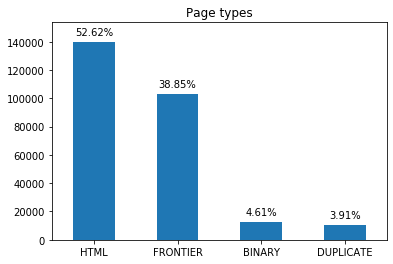

In [10]:
ax = page_type_counts['count'].plot.bar(title='Page types', rot=0)
percentages = [f'{p:.2f}%' for p in (page_type_counts['relative'] * 100)]
annotate_bar(ax, percentages)

plt.savefig('figures/page_types.pdf')

Domain counts

In [11]:
site_count = count_values(pages.domain)
site_count

,count,relative
okolje.arso.gov.si,65011,0.233891
arsq.gov.si,37958,0.136562
www.gov.si,26127,0.093998
kpv.arso.gov.si,22371,0.080485
www.s-kzg.gov.si,14649,0.052703
...,...,...
emddsz.gov.si,1,0.000004
www.uvn.gov.si,1,0.000004
www.15let.gov.si,1,0.000004
upravneenote.arhiv-spletisc.gov.si,1,0.000004


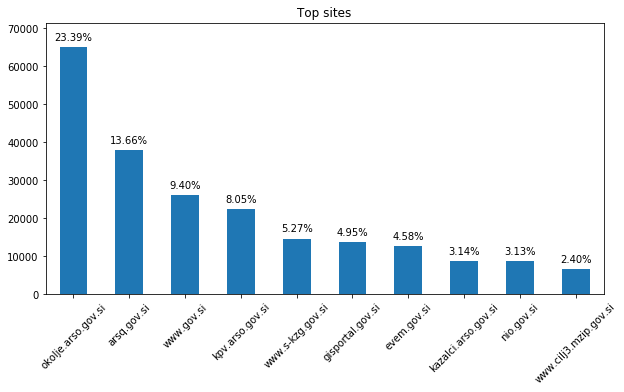

In [12]:
ax = site_count.iloc[:10]['count'].plot.bar(figsize=(10,5), title='Top sites', rot=45)

percentages = [f'{p:.2f}%' for p in (site_count.iloc[:10]['relative'] * 100)]
annotate_bar(ax, percentages)

plt.savefig('figures/sites.pdf')

### Links summaries

In [13]:
page_data

,page_id,data_type_code,url
id,,,
1,4,PDF,https://www.e-prostor.gov.si/fileadmin/Spletni...
2,4,DOC,https://www.e-prostor.gov.si/fileadmin/narocan...
3,52,DOC,https://www.mvn.e-prostor.gov.si/fileadmin/use...
4,52,PDF,https://www.mvn.e-prostor.gov.si/fileadmin/use...
5,52,PDF,https://www.mvn.e-prostor.gov.si/fileadmin/use...
...,...,...,...
101349,7928907,PDF,https://www.gov.si/assets/organi-v-sestavi/UPP...
101350,7928907,PDF,https://www.gov.si/assets/organi-v-sestavi/IJS...
101351,7928907,PDF,https://www.gov.si/assets/organi-v-sestavi/URS...


In [14]:
link_counts = pd.DataFrame({
    'out_links': links.from_page.value_counts(),
    'in_links': links.to_page.value_counts(),
    'images': images.page_id.value_counts(),
    'data_files': page_data.page_id.value_counts(),
})
link_counts = link_counts.loc[html_pages.index]
link_counts = link_counts.fillna(0)
link_counts.describe()

,out_links,in_links,images,data_files
count,139685.000000,139685.000000,139685.000000,139685.000000
mean,64.359215,61.574693,6.740065,0.671804
std,114.065174,528.600448,6.743635,5.642136
min,0.000000,0.000000,0.000000,0.000000
25%,14.000000,2.000000,2.000000,0.000000
50%,30.000000,3.000000,5.000000,0.000000
75%,50.000000,9.000000,11.000000,0.000000
max,2309.000000,43660.000000,412.000000,786.000000


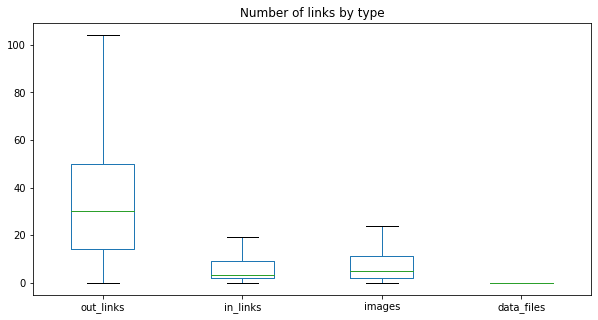

In [15]:
link_counts.plot.box(showfliers=False, figsize=(10,5), title='Number of links by type')
plt.savefig('figures/link_types.pdf')

Pages with maximum number of links by type

In [57]:
max_out = link_counts.index[link_counts.out_links.argmax()]
max_in = link_counts.index[link_counts.in_links.argmax()]
max_images = link_counts.index[link_counts.images.argmax()]
max_data = link_counts.index[link_counts.data_files.argmax()]

In [66]:
print(f'Max out links: {pages.loc[max_out].url}')
print(f'Max in links: {pages.loc[max_in].url}')
print(f'Max images: {pages.loc[max_images].url}')
print(f'Max data links: {pages.loc[max_data].url}')

Max out links: http://evem.gov.si/info/podpogoji/
Max in links: http://www.arso.gov.si/
Max images: http://meteo.arso.gov.si/met/en/watercycle/maps/growa_si
Max data links: https://www.gov.si/drzavni-organi/ministrstva/ministrstvo-za-kmetijstvo-gozdarstvo-in-prehrano/o-ministrstvu/seznami-certificiranih-proizvajalcev/


### Page data analysis

In [16]:
page_data.head()

,page_id,data_type_code,url
id,,,
1,4,PDF,https://www.e-prostor.gov.si/fileadmin/Spletni...
2,4,DOC,https://www.e-prostor.gov.si/fileadmin/narocan...
3,52,DOC,https://www.mvn.e-prostor.gov.si/fileadmin/use...
4,52,PDF,https://www.mvn.e-prostor.gov.si/fileadmin/use...
5,52,PDF,https://www.mvn.e-prostor.gov.si/fileadmin/use...


In [17]:
data_type_counts = count_values(page_data.data_type_code)
data_type_counts

,count,relative
PDF,84689,0.835585
DOC,10266,0.101290
DOCX,5804,0.057265
PPT,373,0.003680
PPTX,221,0.002180


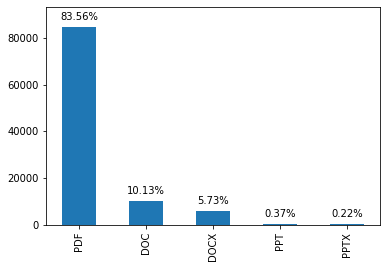

In [18]:
ax = data_type_counts['count'].plot.bar()
percentages = [f'{p:.2f}%' for p in (data_type_counts['relative'] * 100)]
annotate_bar(ax, percentages)

plt.savefig('figures/data_types.pdf')

### HTML content size

In [19]:
mb_length = html_pages.length / 1024 / 1024
mb_length.describe()

count    139685.000000
mean          0.044298
std           0.098127
min           0.000037
25%           0.013473
50%           0.018744
75%           0.043734
max           4.911660
Name: length, dtype: float64

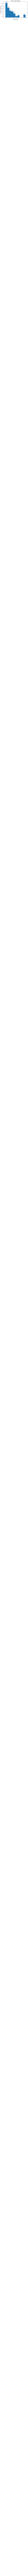

In [20]:
ax = mb_length.plot.hist(log=True, title='HTML content length')
ax.set(xlabel='Length [MB]', ylabel='Frequency (log scale)')
freqs = [int(p.get_height()) for p in ax.patches]
annotate_bar(ax, freqs)
plt.savefig('figures/sizes.pdf')

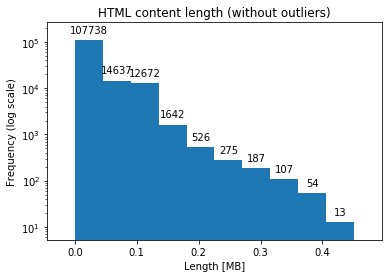

In [21]:
ax = mb_length[mb_length<0.5].plot.hist(bins=10, log=True, title='HTML content length (without outliers)')
ax.set(xlabel='Length [MB]', ylabel='Frequency (log scale)')
freqs = [int(p.get_height()) for p in ax.patches]
annotate_bar(ax, freqs)
plt.savefig('figures/sizes_zoomed.pdf')

In [90]:
m = html_pages.length > 4.644942e+04
html_pages[m].length.sum()/1024/1024, sum(m)

(4331.10583114624, 33521)

In [89]:
m = html_pages.length < 4.644942e+04
html_pages[m].length.sum()/1024/1024, sum(m)

(1856.6069011688232, 106164)

In [34]:
total_size = html_pages.length.sum()

In [42]:
len(html_pages)

139685

In [41]:
total_size / 1024 / 1024

6187.7127323150635

In [43]:
html_pages_sorted = html_pages.sort_values('length', ascending=False)
size_cumsum = html_pages_sorted.length.cumsum()

In [51]:
np.where(size_cumsum > 0.9 * total_size)

(array([ 81843,  81844,  81845, ..., 139682, 139683, 139684]),)

In [53]:
size_cumsum.iloc[20000] / total_size

0.5815751327917587